In [41]:
# This cell is handling all the importing of libraries and tools
# imports tensorflow and tf.keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.6.0
Keras Version: 2.6.0


In [42]:
# import NIST data base for hand written digits
# Print the shapes of data as loaded 
# then reshape to the data to flatten from 2 dimension (28,28) to 1 dimension (28*28)
# 
# X_train - array of gray scale image data with shapes containing traning data
# y_train - array of digit labels with shape for training data
# x_test - greyscale image data, test data
# y_test - digit labels, for test data

from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


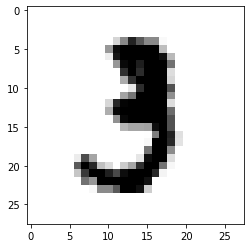

In [43]:
# remapping/reshaping back to 2 dimension and plotting first data point
# to visualize the data point

# changed to observer different digit

plt.imshow(Xtrain[10].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


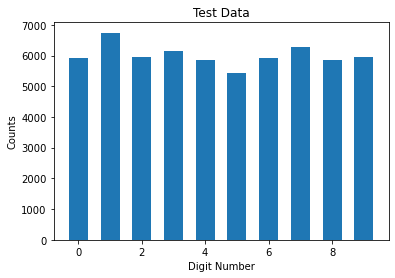

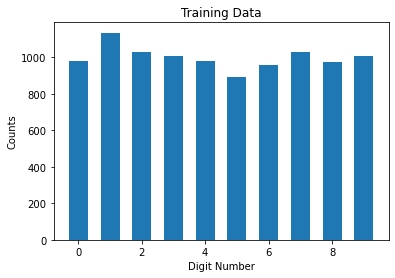

In [44]:
# Get distribution of data labels and plot in bar chart
digit_train, counts_train = np.unique(ytrain, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.title('Test Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# display histogram for test data
digit_test, counts_test = np.unique(ytest, return_counts = True)
distribution_test = dict(zip(digit_test , counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.title('Training Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()


In [45]:
# splitting the training data into train and test subsets
# test size set to 1/12 proportion of the training data set

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/6, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(50000, 784) (10000, 784)
[8 5 1 ... 0 0 4] [7 3 8 ... 9 8 1]


In [46]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)

# Network Design 1
# Model with 3 hiddle layers with all linear activation functions
# and softmax activation at the ouput layer
# the training and test data have been split using same values as original notebook 
# to establish baseline performance


from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(300, activation ="linear"))
model.add(keras.layers.Dense(300, activation ="linear"))
model.add(keras.layers.Dense(300, activation ="linear"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [47]:
# training the model using model.fit()

performance = model.fit(X_train, y_train, batch_size=10, epochs=5, validation_data =(X_val,y_val))


Epoch 1/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.6327 - accuracy: 0.8365 - val_loss: 0.3976 - val_accuracy: 0.8891
Epoch 2/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3710 - accuracy: 0.8949 - val_loss: 0.3427 - val_accuracy: 0.9036
Epoch 3/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3363 - accuracy: 0.9047 - val_loss: 0.3232 - val_accuracy: 0.9075
Epoch 4/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3196 - accuracy: 0.9094 - val_loss: 0.3100 - val_accuracy: 0.9104
Epoch 5/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.3089 - accuracy: 0.9127 - val_loss: 0.3023 - val_accuracy: 0.9137


In [48]:
# print a summary of our model and each layer

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (10, 300)                 235500    
_________________________________________________________________
dense_23 (Dense)             (10, 300)                 90300     
_________________________________________________________________
dense_24 (Dense)             (10, 300)                 90300     
_________________________________________________________________
dense_25 (Dense)             (10, 10)                  3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


In [49]:
# evaluate model on test data

X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     


Accuracy: 0.915


In [50]:
# generate confusion matrix and classification report
# report shows scores for precision, recall, F1, and support scores of the model

from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Confusion Matrix
[[ 958    0    9    3    2    9   17    2    7   10]
 [   0 1105   10    0    2    3    3    9    8    8]
 [   3    2  899   15    6    4    6   21    4    2]
 [   3    2   24  916    1   34    1    9   28    9]
 [   0    1   16    0  914   13   17    6   12   38]
 [   6    2    3   33    0  769   21    1   32    7]
 [   5    4   11    1    7   17  889    0   11    0]
 [   3    2   12   13    2    6    3  936   11   18]
 [   2   17   39   19    5   30    1    2  854    8]
 [   0    0    9   10   43    7    0   42    7  909]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1017
           1       0.97      0.96      0.97      1148
           2       0.87      0.93      0.90       962
           3       0.91      0.89      0.90      1027
           4       0.93      0.90      0.91      1017
           5       0.86      0.88      0.87       874
           6       0.93      0.94      0.93       9

In [51]:
# plotting accuracy vs epochs
performance.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

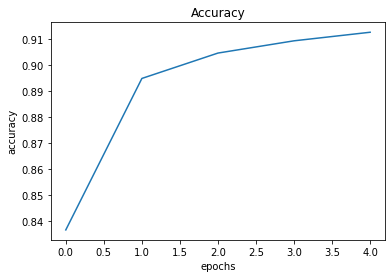

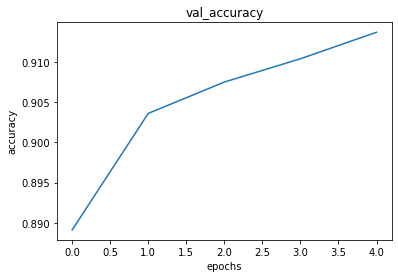

In [52]:
plt.plot(performance.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(performance.history['val_accuracy'])
plt.title('val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Interestingly, by changing the training and test data split, the performace of the model was significantly improved. This may indicate that when using linear activation function, the model may be susceptible to overfitting. Therefore, to tune model performance further, we should experiment with different data splits to see what yields the greatest model accuracy.